In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/spotify_history.csv')

In [4]:
df

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149855,4Fz1WWr5o0OrlIcZxcyZtK,2024-12-15 23:06:19,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,True
149856,0qHMhBZqYb99yhX9BHcIkV,2024-12-15 23:06:21,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,True
149857,0HHdujGjOZChTrl8lJWEIq,2024-12-15 23:06:22,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,True
149858,7peh6LUcdNPcMdrSH4JPsM,2024-12-15 23:06:23,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [6]:
df['ts']= pd.to_datetime(df['ts'])

In [7]:
df['hour']=df['ts'].dt.hour
df['date']=df['ts'].dt.date
df['month']=df['ts'].dt.to_period('M')
df['day_of_week ']=df['ts'].dt.day_name()

In [8]:
df = df.dropna()

In [9]:
df.head(5)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,hour,date,month,day_of_week
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False,2,2013-07-08,2013-07,Monday
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False,2,2013-07-08,2013-07,Monday
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False,2,2013-07-08,2013-07,Monday
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False,2,2013-07-08,2013-07,Monday
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False,3,2013-07-08,2013-07,Monday


In [10]:
df['track_name'].value_counts().head(10)

track_name
Ode To The Mets                      207
In the Blood                         181
Dying Breed                          166
Caution                              164
19 Dias y 500 Noches - En Directo    148
For What It's Worth                  146
All These Things That I've Done      142
Concerning Hobbits                   142
Come Together - Remastered 2009      137
The Boxer                            135
Name: count, dtype: int64

### Top tracks

C:\Users\shunp\AppData\Local\Temp\ipykernel_13928\1902914948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tracks.values,y=top_tracks.index, palette='tab10')


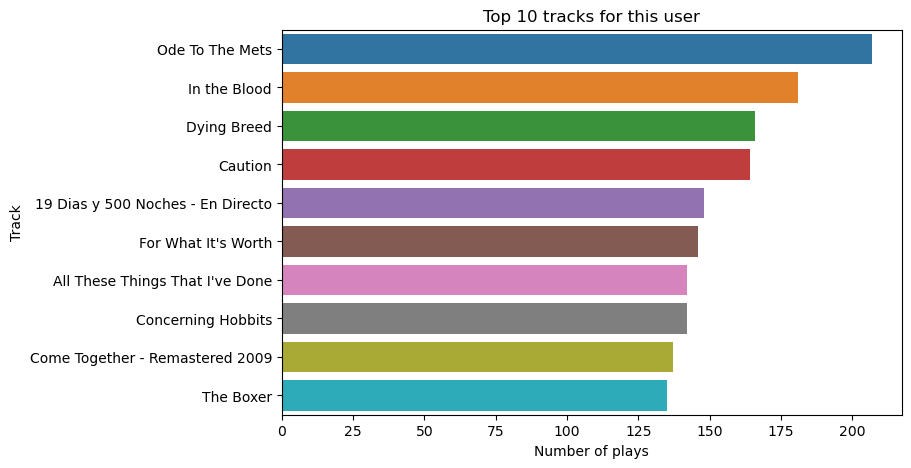

In [11]:
top_tracks = df['track_name'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_tracks.values,y=top_tracks.index, palette='tab10')

plt.title('Top 10 tracks for this user')
plt.xlabel('Number of plays')
plt.ylabel('Track')

plt.show()

### Top albums

C:\Users\shunp\AppData\Local\Temp\ipykernel_13928\2664383417.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_albums.values,y=top_albums.index, palette='colorblind')


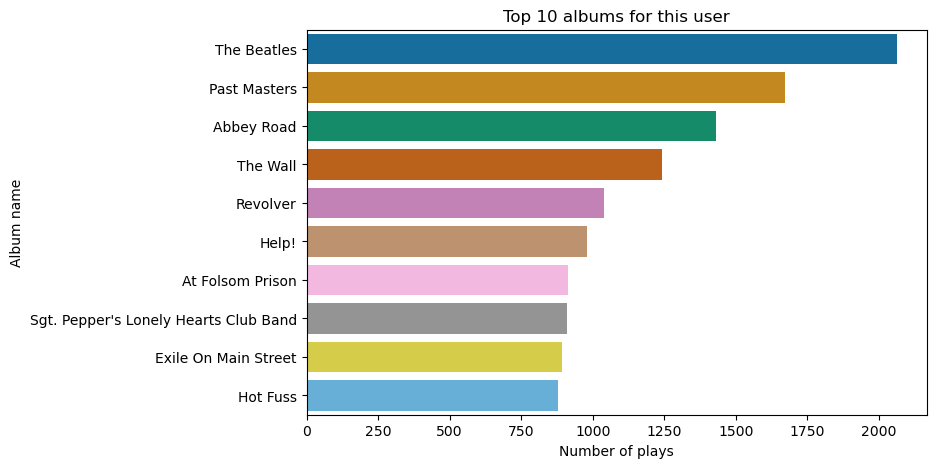

In [12]:
top_albums = df['album_name'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_albums.values,y=top_albums.index, palette='colorblind')

plt.title('Top 10 albums for this user')
plt.xlabel('Number of plays')
plt.ylabel('Album name')

plt.show()

### Top artist

C:\Users\shunp\AppData\Local\Temp\ipykernel_13928\3710857697.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values,y=top_artists.index,palette='husl')


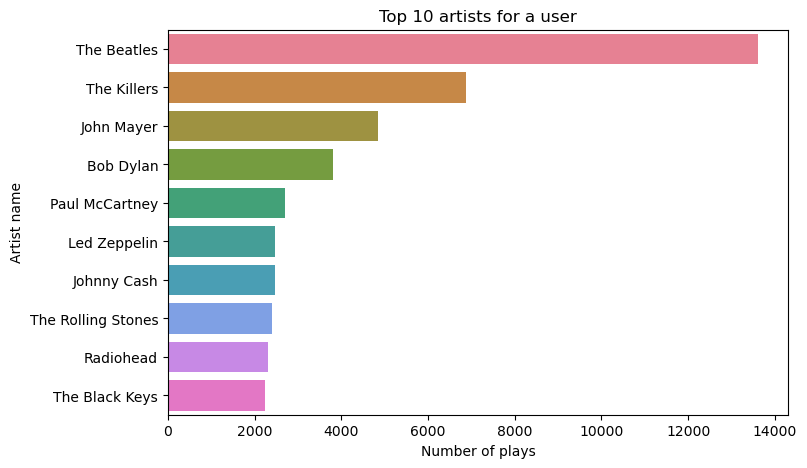

In [13]:
top_artists = df['artist_name'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_artists.values,y=top_artists.index,palette='husl')

plt.title('Top 10 artists for a user')
plt.xlabel('Number of plays')
plt.ylabel('Artist name')

plt.show()

### Hour pattern

C:\Users\shunp\AppData\Local\Temp\ipykernel_13928\1458948462.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hours_count.index,y=hours_count.values,palette='hls')


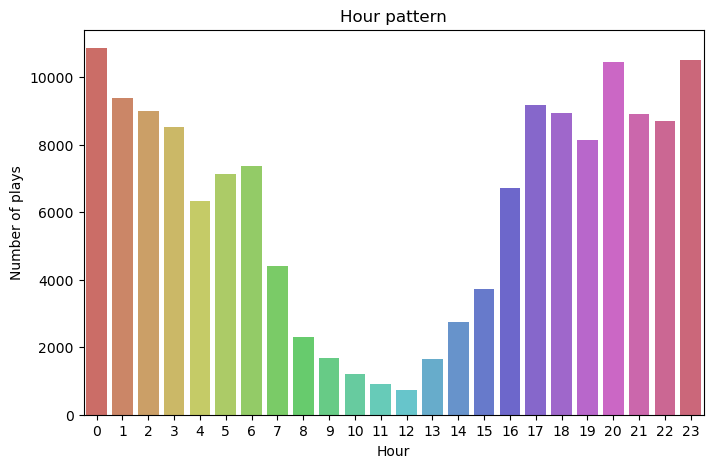

In [14]:
hours_count = df.groupby('hour').size()

plt.figure(figsize=(8,5))
sns.barplot(x=hours_count.index,y=hours_count.values,palette='hls')

plt.title('Hour pattern')
plt.xlabel('Hour')
plt.ylabel('Number of plays')

plt.show()

### Week pattern

C:\Users\shunp\AppData\Local\Temp\ipykernel_13928\1663739314.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=week_count.index,y=week_count.values,palette='pastel')


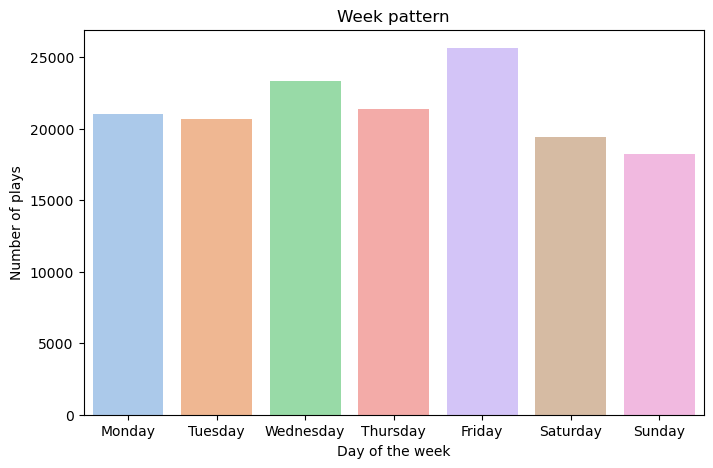

In [15]:
week_count = df.groupby('day_of_week ').size().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(8,5))
sns.barplot(x=week_count.index,y=week_count.values,palette='pastel')

plt.title('Week pattern')
plt.xlabel('Day of the week')
plt.ylabel('Number of plays')

plt.show()

### Percentage of skipping

In [16]:
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,hour,date,month,day_of_week
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False,2,2013-07-08,2013-07,Monday
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False,2,2013-07-08,2013-07,Monday
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False,2,2013-07-08,2013-07,Monday
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False,2,2013-07-08,2013-07,Monday
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False,3,2013-07-08,2013-07,Monday


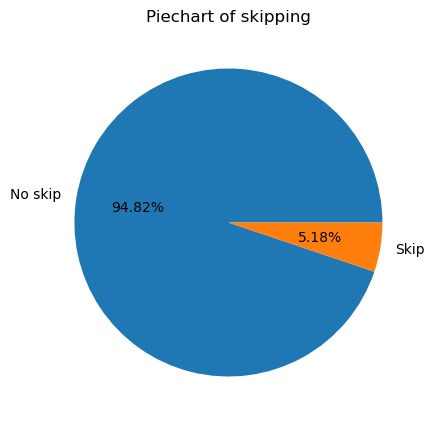

In [17]:
skip_count = df.groupby('skipped').size()
labels = ['No skip', 'Skip']

plt.figure(figsize=(8,5))
plt.pie(skip_count.values,labels=labels,autopct='%.2f%%')

plt.title('Piechart of skipping')

plt.show()

### Percentage of shuffle

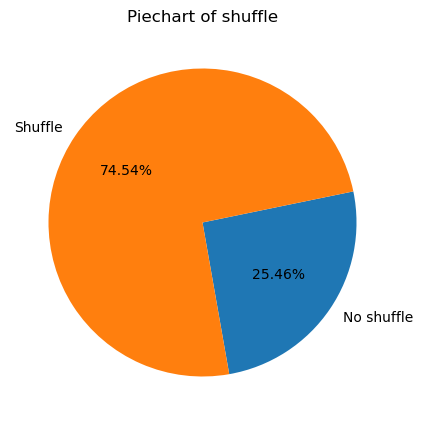

In [18]:
shuffle_count = df.groupby('shuffle').size()
labels = ['No shuffle', 'Shuffle']

plt.figure(figsize=(8,5))
plt.pie(shuffle_count.values,labels=labels,autopct='%.2f%%',startangle=280)

plt.title('Piechart of shuffle')

plt.show()

### Reasons of start and end

In [19]:
df['reason_end'].value_counts()

reason_end
trackdone                       77110
fwdbtn                          53462
endplay                         10116
logout                           4367
backbtn                          2182
unexpected-exit-while-paused     1725
unknown                           268
remote                            224
unexpected-exit                   118
clickrow                           34
nextbtn                            21
appload                             7
popup                               6
reload                              4
trackerror                          4
Name: count, dtype: int64

In [20]:
start_count.index

NameError: name 'start_count' is not defined

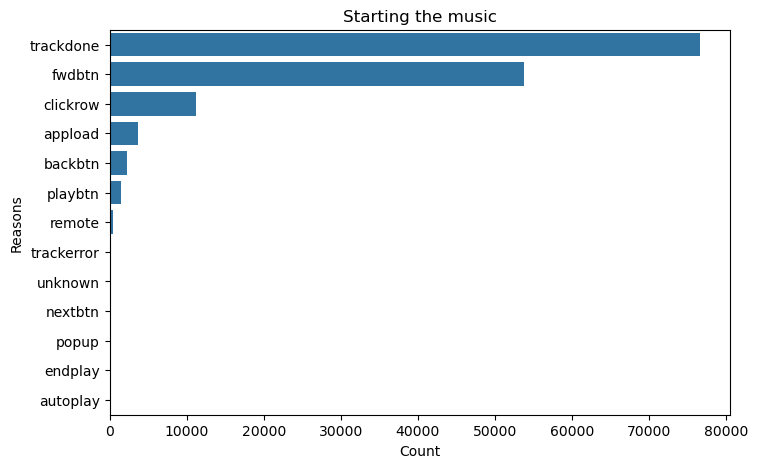

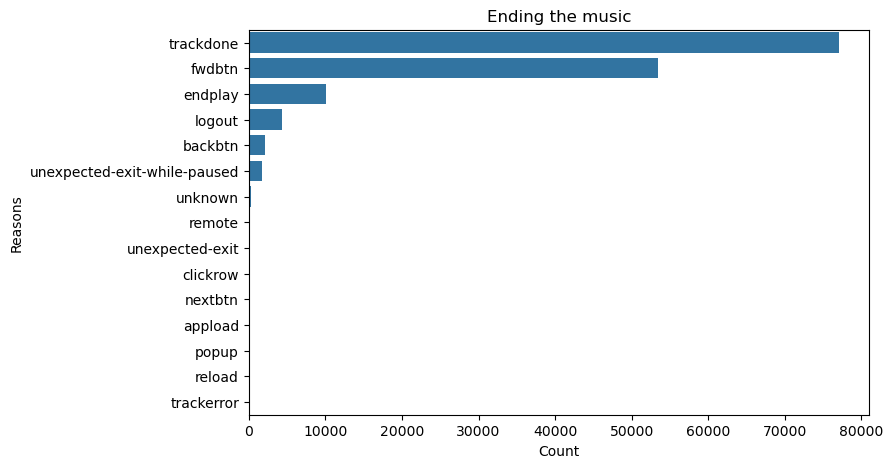

In [ ]:
start_count = df.groupby('reason_start').size().sort_values(ascending=False)
end_count = df.groupby('reason_end').size().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=start_count.values,y=start_count.index)

plt.title('Starting the music')
plt.ylabel('Reasons')
plt.xlabel('Count')

plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=end_count.values,y=end_count.index)

plt.title('Ending the music')
plt.ylabel('Reasons')
plt.xlabel('Count')

plt.show()

### Platform usage distribution

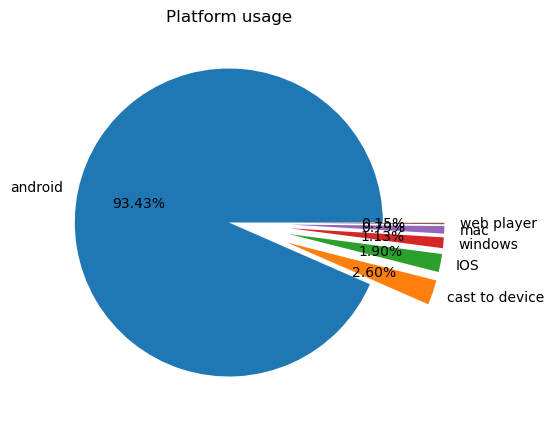

In [ ]:
platform = df.groupby('platform').size().sort_values(ascending=False)

labels = ['android','cast to device', 'IOS', 'windows', 'mac', 'web player']
explode_labels = [0,0.4,0.4,0.4,0.4,0.4]

plt.figure(figsize=(8,5))
plt.pie(platform.values,labels=labels,autopct='%.2f%%',explode=explode_labels)

plt.title('Platform usage')

plt.show()